In [216]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import accuracy_score

## **Loading Health Data**

In [217]:
data_health=pd.read_csv("health_insurance.csv")

In [218]:
#showing the first 10 rows
data_health.head()

,age,sex,bmi,children,smoker,region,salary,insured
0,19,female,27.900,0,yes,southwest,83039,1
1,18,male,33.770,1,no,southeast,68286,1
2,28,male,33.000,3,no,southeast,18873,0
3,33,male,22.705,0,no,northwest,77377,1
4,32,male,28.880,0,no,northwest,42428,1


## **Data Preprossessing**


In [219]:
#shape of dataframe
data_health.shape

(1338, 8)

In [220]:
#statistical measures and as we can see there are no missing values
data_health.describe()

,age,bmi,children,salary,insured
count,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,55159.035874,0.666667
std,14.049960,6.098187,1.205493,26355.547662,0.471581
min,18.000000,15.960000,0.000000,10038.000000,0.000000
25%,27.000000,26.296250,0.000000,32053.000000,0.000000
50%,39.000000,30.400000,1.000000,56294.000000,1.000000
75%,51.000000,34.693750,2.000000,77442.250000,1.000000
max,64.000000,53.130000,5.000000,99946.000000,1.000000


#### **Data Visualization**

<Axes: xlabel='region', ylabel='count'>

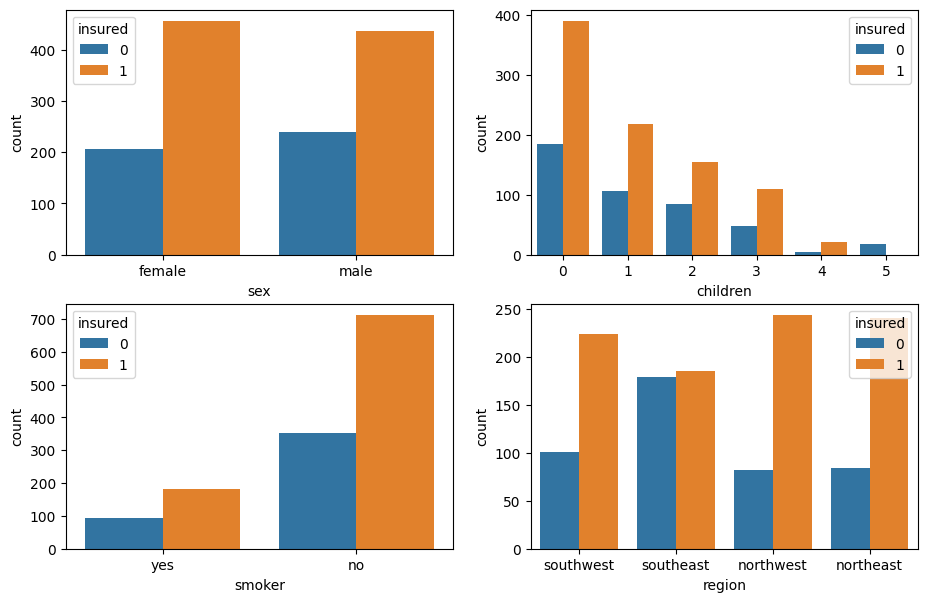

In [221]:
#Visualizing the relation between Target and Feature variables
import matplotlib.pyplot as plt

fig,ax=plt.subplots(2,2,figsize=(11,7))
sns.countplot(x="sex",hue="insured",data=data_health,ax=ax[0][0])
sns.countplot(x="children",hue="insured",data=data_health,ax=ax[0][1])
sns.countplot(x="smoker",hue="insured",data=data_health,ax=ax[1][0])
sns.countplot(x="region",hue="insured",data=data_health,ax=ax[1][1])

- as we can see that more female than men are then accepted basing on count.For both cases more people are being insured as compared to those not accepted
- for parents having 5 number children are only with 0 to non insured as compared for other cases where there more insured with 4 children or less
- a large number who do not smoke are insured that are over 700 people as compared to around 200 smokers insured.For Both cases the number of insured are higher than those not insured
- basing on region, those from northwest are insured as compared to not insured this also for northeast.southeast had almost equal number of insured and not insured and low insured as compared to others.

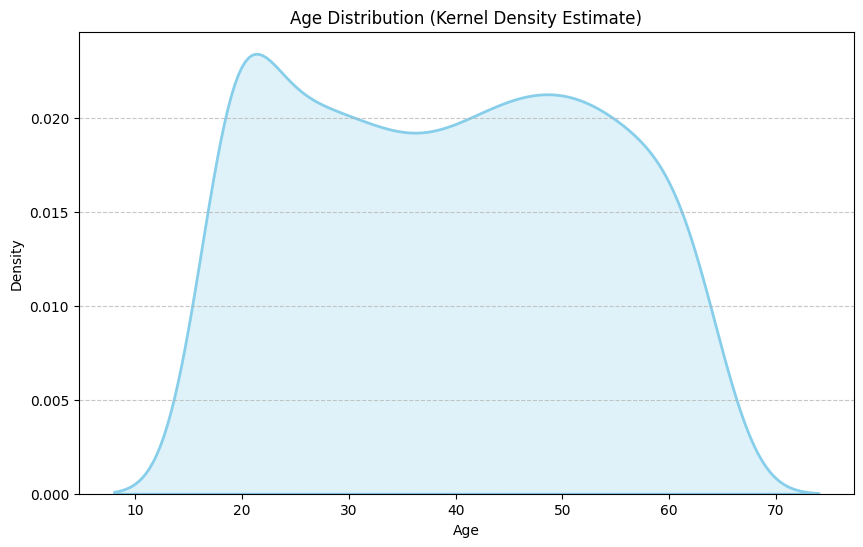

In [222]:
# Plotting age distribution
plt.figure(figsize=(10, 6))
sns.kdeplot(data_health['age'], fill=True, color='skyblue', linestyle='-', linewidth=2)

plt.title('Age Distribution (Kernel Density Estimate)')
plt.xlabel('Age')
plt.ylabel('Density')
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()

- as we can see that most of those insured are between 16-24 years of age and 40-55 as compared to other age groups because of the peak

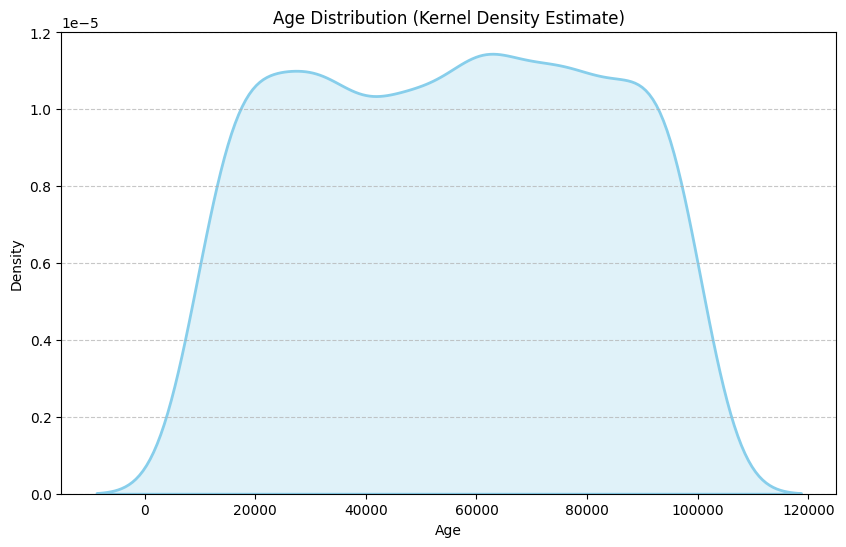

In [223]:
# Plotting salary distribution
plt.figure(figsize=(10, 6))
sns.kdeplot(data_health['salary'], fill=True, color='skyblue', linestyle='-', linewidth=2)

plt.title('Age Distribution (Kernel Density Estimate)')
plt.xlabel('Age')
plt.ylabel('Density')
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()

- as we can see that salaries are between 20000 and 100000

In [224]:

# Calculate the IQR for salary
Q1 = data_health['salary'].quantile(0.25)
Q3 = data_health['salary'].quantile(0.75)
IQR = Q3 - Q1

# Define the upper and lower bounds to filter outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter out outliers
data_health = data_health[(data_health['salary'] >= lower_bound) & (data_health['salary'] <= upper_bound)]
data_health.head()


,age,sex,bmi,children,smoker,region,salary,insured
0,19,female,27.900,0,yes,southwest,83039,1
1,18,male,33.770,1,no,southeast,68286,1
2,28,male,33.000,3,no,southeast,18873,0
3,33,male,22.705,0,no,northwest,77377,1
4,32,male,28.880,0,no,northwest,42428,1


In [225]:
#checking contesnt in smoker and region
data_health["sex"].unique(),data_health["smoker"].unique(),data_health["region"].unique()

(array(['female', 'male'], dtype=object),
 array(['yes', 'no'], dtype=object),
 array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object))

In [226]:
data_health

,age,sex,bmi,children,smoker,region,salary,insured
0,19,female,27.900,0,yes,southwest,83039,1
1,18,male,33.770,1,no,southeast,68286,1
2,28,male,33.000,3,no,southeast,18873,0
3,33,male,22.705,0,no,northwest,77377,1
4,32,male,28.880,0,no,northwest,42428,1
...,...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,12783,0
1334,18,female,31.920,0,no,northeast,11535,0
1335,18,female,36.850,0,no,southeast,57005,0
1336,21,female,25.800,0,no,southwest,93125,1


In [227]:
#label encoding for smoker and region
from feature_engine.encoding import OrdinalEncoder

oe = OrdinalEncoder(encoding_method='ordered')

data_health[data_health.select_dtypes(include='object').columns] = oe.fit_transform(X = data_health.select_dtypes(include='object') ,y = data_health.insured)
data_health


,age,sex,bmi,children,smoker,region,salary,insured
0,19,1,27.900,0,0,1,83039,1
1,18,0,33.770,1,1,0,68286,1
2,28,0,33.000,3,1,0,18873,0
3,33,0,22.705,0,1,3,77377,1
4,32,0,28.880,0,1,3,42428,1
...,...,...,...,...,...,...,...,...
1333,50,0,30.970,3,1,3,12783,0
1334,18,1,31.920,0,1,2,11535,0
1335,18,1,36.850,0,1,0,57005,0
1336,21,1,25.800,0,1,1,93125,1


In [228]:
#As we can see there is weak correlation between insured and bmi and we might consider dropping it later
data_health.corr()

,age,sex,bmi,children,smoker,region,salary,insured
age,1.000000,0.020856,0.109272,0.042469,0.025019,0.005212,0.020327,-0.041391
sex,0.020856,1.000000,-0.046371,-0.017163,0.076185,0.016121,-0.047560,0.043338
bmi,0.109272,-0.046371,1.000000,0.012759,-0.003750,-0.261829,-0.010781,-0.588306
children,0.042469,-0.017163,0.012759,1.000000,-0.007673,0.019257,0.013611,-0.049557
smoker,0.025019,0.076185,-0.003750,-0.007673,1.000000,0.053930,0.021449,0.006548
region,0.005212,0.016121,-0.261829,0.019257,0.053930,1.000000,0.025149,0.188398
salary,0.020327,-0.047560,-0.010781,0.013611,0.021449,0.025149,1.000000,0.293824
insured,-0.041391,0.043338,-0.588306,-0.049557,0.006548,0.188398,0.293824,1.000000


In [229]:
#see the encoded data
data_health.head()

,age,sex,bmi,children,smoker,region,salary,insured
0,19,1,27.900,0,0,1,83039,1
1,18,0,33.770,1,1,0,68286,1
2,28,0,33.000,3,1,0,18873,0
3,33,0,22.705,0,1,3,77377,1
4,32,0,28.880,0,1,3,42428,1


In [230]:
#year of birth for applicant
data_health = data_health.assign(
    year_of_birth=2023 - data_health.age
)
data_health.head()

,age,sex,bmi,children,smoker,region,salary,insured,year_of_birth
0,19,1,27.900,0,0,1,83039,1,2004
1,18,0,33.770,1,1,0,68286,1,2005
2,28,0,33.000,3,1,0,18873,0,1995
3,33,0,22.705,0,1,3,77377,1,1990
4,32,0,28.880,0,1,3,42428,1,1991


In [231]:
#bmi to age
data_health = data_health.assign(
    bmi_to_age_ratio = data_health.bmi / data_health.age
)
data_health

#salaries per sex


,age,sex,bmi,children,smoker,region,salary,insured,year_of_birth,bmi_to_age_ratio
0,19,1,27.900,0,0,1,83039,1,2004,1.468421
1,18,0,33.770,1,1,0,68286,1,2005,1.876111
2,28,0,33.000,3,1,0,18873,0,1995,1.178571
3,33,0,22.705,0,1,3,77377,1,1990,0.688030
4,32,0,28.880,0,1,3,42428,1,1991,0.902500
...,...,...,...,...,...,...,...,...,...,...
1333,50,0,30.970,3,1,3,12783,0,1973,0.619400
1334,18,1,31.920,0,1,2,11535,0,2005,1.773333
1335,18,1,36.850,0,1,0,57005,0,2005,2.047222
1336,21,1,25.800,0,1,1,93125,1,2002,1.228571


In [232]:
#salary per age
salary_to_age = data_health["salary"].groupby(data_health.sex).sum()
data_health = data_health.assign(
    salary_per_age = data_health.sex.apply(lambda x:salary_to_age[salary_to_age.index ==x].iat[0])
)
data_health.head()


,age,sex,bmi,children,smoker,region,salary,insured,year_of_birth,bmi_to_age_ratio,salary_per_age
0,19,1,27.900,0,0,1,83039,1,2004,1.468421,35677072
1,18,0,33.770,1,1,0,68286,1,2005,1.876111,38125718
2,28,0,33.000,3,1,0,18873,0,1995,1.178571,38125718
3,33,0,22.705,0,1,3,77377,1,1990,0.688030,38125718
4,32,0,28.880,0,1,3,42428,1,1991,0.902500,38125718


In [233]:
#salary per region 
salary_to_region = data_health["salary"].groupby(data_health.region).sum()
data_health = data_health.assign(
    salary_per_region = data_health.region.apply(lambda x:salary_to_region[salary_to_region.index ==x].iat[0])
)
data_health.head()

,age,sex,bmi,children,smoker,region,salary,insured,year_of_birth,bmi_to_age_ratio,salary_per_age,salary_per_region
0,19,1,27.900,0,0,1,83039,1,2004,1.468421,35677072,18709399
1,18,0,33.770,1,1,0,68286,1,2005,1.876111,38125718,19062363
2,28,0,33.000,3,1,0,18873,0,1995,1.178571,38125718,19062363
3,33,0,22.705,0,1,3,77377,1,1990,0.688030,38125718,17680530
4,32,0,28.880,0,1,3,42428,1,1991,0.902500,38125718,17680530


In [234]:
#salary per year
salary_to_year = data_health["salary"].groupby(data_health['year_of_birth']).sum()
data_health = data_health.assign(
    salary_per_year = data_health['year_of_birth'].apply(lambda x:salary_to_year[salary_to_year.index ==x].iat[0])
)
data_health.head()

,age,sex,bmi,children,smoker,region,salary,insured,year_of_birth,bmi_to_age_ratio,salary_per_age,salary_per_region,salary_per_year
0,19,1,27.900,0,0,1,83039,1,2004,1.468421,35677072,18709399,3807641
1,18,0,33.770,1,1,0,68286,1,2005,1.876111,38125718,19062363,3634188
2,28,0,33.000,3,1,0,18873,0,1995,1.178571,38125718,19062363,1405403
3,33,0,22.705,0,1,3,77377,1,1990,0.688030,38125718,17680530,1414370
4,32,0,28.880,0,1,3,42428,1,1991,0.902500,38125718,17680530,1637857


In [235]:
#bmi per smoker
bmi_to_smoker = data_health["bmi"].groupby(data_health['smoker']).sum()
data_health = data_health.assign(
    bmi_per_smoker = data_health['smoker'].apply(lambda x:bmi_to_smoker[bmi_to_smoker.index ==x].iat[0])
)
data_health.head()

,age,sex,bmi,children,smoker,region,salary,insured,year_of_birth,bmi_to_age_ratio,salary_per_age,salary_per_region,salary_per_year,bmi_per_smoker
0,19,1,27.900,0,0,1,83039,1,2004,1.468421,35677072,18709399,3807641,8414.115
1,18,0,33.770,1,1,0,68286,1,2005,1.876111,38125718,19062363,3634188,32613.510
2,28,0,33.000,3,1,0,18873,0,1995,1.178571,38125718,19062363,1405403,32613.510
3,33,0,22.705,0,1,3,77377,1,1990,0.688030,38125718,17680530,1414370,32613.510
4,32,0,28.880,0,1,3,42428,1,1991,0.902500,38125718,17680530,1637857,32613.510


In [236]:
#children per sex
children_to_sex = data_health["children"].groupby(data_health['sex']).sum()
data_health = data_health.assign(
    children_per_sex = data_health['sex'].apply(lambda x:children_to_sex[children_to_sex.index ==x].iat[0])
)
data_health.head()

,age,sex,bmi,children,smoker,region,salary,insured,year_of_birth,bmi_to_age_ratio,salary_per_age,salary_per_region,salary_per_year,bmi_per_smoker,children_per_sex
0,19,1,27.900,0,0,1,83039,1,2004,1.468421,35677072,18709399,3807641,8414.115,711
1,18,0,33.770,1,1,0,68286,1,2005,1.876111,38125718,19062363,3634188,32613.510,754
2,28,0,33.000,3,1,0,18873,0,1995,1.178571,38125718,19062363,1405403,32613.510,754
3,33,0,22.705,0,1,3,77377,1,1990,0.688030,38125718,17680530,1414370,32613.510,754
4,32,0,28.880,0,1,3,42428,1,1991,0.902500,38125718,17680530,1637857,32613.510,754


In [237]:
from feature_engine.creation import CyclicalFeatures

cf = CyclicalFeatures()

# creating cyclical features
cyclical_featres=cf.fit_transform(
    X=data_health[
        [
            "age",
            "bmi",
            "salary",
        ]
    ],
    y=data_health["insured"],
)
cyclical_featres.head()


,age,bmi,salary,age_sin,age_cos,bmi_sin,bmi_cos,salary_sin,salary_cos
0,19,27.900,83039,9.569403e-01,-0.290285,-0.157223,-0.987563,-0.873756,0.486365
1,18,33.770,68286,9.807853e-01,-0.195090,-0.752643,-0.658428,-0.913278,-0.407336
2,28,33.000,18873,3.826834e-01,-0.923880,-0.689651,-0.724142,0.927050,0.374938
3,33,22.705,77377,-9.801714e-02,-0.995185,0.440797,-0.897607,-0.988474,0.151394
4,32,28.880,42428,1.224647e-16,-1.000000,-0.270366,-0.962758,0.456736,-0.889602


In [238]:
#merging_objects into dataframe
data_health = cyclical_featres.merge(
    data_health[data_health.columns.difference(cyclical_featres.columns)],
    how='left',
    right_index=True,
    left_index=True
)

In [239]:
data_health[['children', 'region', 'sex', 'smoker','year_of_birth']] = data_health[['children', 'region', 'sex', 'smoker','year_of_birth']].astype(int)


In [240]:
data_health.dtypes

age                    int64
bmi                  float64
salary                 int64
age_sin              float64
age_cos              float64
bmi_sin              float64
bmi_cos              float64
salary_sin           float64
salary_cos           float64
bmi_per_smoker       float64
bmi_to_age_ratio     float64
children               int32
children_per_sex       int64
insured                int64
region                 int32
salary_per_age         int64
salary_per_region      int64
salary_per_year        int64
sex                    int32
smoker                 int32
year_of_birth          int32
dtype: object

## **Pre-Modelling**

In [241]:
X = data_health.drop(columns='insured')
y = data_health['insured']

In [242]:
X.head()

,age,bmi,salary,age_sin,age_cos,bmi_sin,bmi_cos,salary_sin,salary_cos,bmi_per_smoker,bmi_to_age_ratio,children,children_per_sex,region,salary_per_age,salary_per_region,salary_per_year,sex,smoker,year_of_birth
0,19,27.900,83039,9.569403e-01,-0.290285,-0.157223,-0.987563,-0.873756,0.486365,8414.115,1.468421,0,711,1,35677072,18709399,3807641,1,0,2004
1,18,33.770,68286,9.807853e-01,-0.195090,-0.752643,-0.658428,-0.913278,-0.407336,32613.510,1.876111,1,754,0,38125718,19062363,3634188,0,1,2005
2,28,33.000,18873,3.826834e-01,-0.923880,-0.689651,-0.724142,0.927050,0.374938,32613.510,1.178571,3,754,0,38125718,19062363,1405403,0,1,1995
3,33,22.705,77377,-9.801714e-02,-0.995185,0.440797,-0.897607,-0.988474,0.151394,32613.510,0.688030,0,754,3,38125718,17680530,1414370,0,1,1990
4,32,28.880,42428,1.224647e-16,-1.000000,-0.270366,-0.962758,0.456736,-0.889602,32613.510,0.902500,0,754,3,38125718,17680530,1637857,0,1,1991


In [243]:
y[:5]

0    1
1    1
2    0
3    1
4    1
Name: insured, dtype: int64

In [244]:
# binning the age and salaries
from feature_engine.discretisation import DecisionTreeDiscretiser

dtd = DecisionTreeDiscretiser(
    random_state=42,
    regression=False,
    scoring="f1",
)
X = dtd.fit_transform(X,y)

X.head()

,age,bmi,salary,age_sin,age_cos,bmi_sin,bmi_cos,salary_sin,salary_cos,bmi_per_smoker,bmi_to_age_ratio,children,children_per_sex,region,salary_per_age,salary_per_region,salary_per_year,sex,smoker,year_of_birth
0,0.680815,0.872798,0.754015,0.672183,0.695709,0.867305,0.915033,0.762533,0.352349,0.660584,0.635887,0.675758,0.687311,0.725873,0.687311,0.725873,0.691558,0.687311,0.660584,0.680815
1,0.565217,0.872798,0.754015,0.565217,0.627417,0.799197,0.867995,0.762533,0.747813,0.668233,0.416667,0.675758,0.646450,0.508242,0.646450,0.508242,0.691558,0.646450,0.668233,0.565217
2,0.680815,0.872798,0.000000,0.672183,0.695709,0.799197,0.867995,0.371237,0.352349,0.668233,0.635887,0.675758,0.646450,0.508242,0.646450,0.508242,0.611111,0.646450,0.668233,0.680815
3,0.680815,0.872798,0.754015,0.672183,0.695709,0.867305,0.867995,0.920000,0.797927,0.668233,0.635887,0.675758,0.646450,0.725873,0.646450,0.725873,0.611111,0.646450,0.668233,0.680815
4,0.680815,0.872798,0.754015,0.672183,0.695709,0.867305,0.867995,0.595745,0.747813,0.668233,0.635887,0.675758,0.646450,0.725873,0.646450,0.725873,0.691558,0.646450,0.668233,0.680815


#### **Train Test Split**

In [245]:
#Split the data into train and test data
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=.2,random_state=42)

In [246]:
#Shape of X train,X test,Y train,Y test
print(X.shape,X_train.shape,X_test.shape)


(1338, 20) (1070, 20) (268, 20)


### **Model Building and Training Model for Decision Tree**

In [247]:
#Fitting decision classifier to the model
from sklearn.tree import DecisionTreeClassifier  
data_health_classifier= DecisionTreeClassifier(criterion='entropy',random_state=0)  
data_health_classifier.fit(X_train, y_train)  

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [248]:
#Predicting the test set result  
y_pred=data_health_classifier.predict(X_test) 
y_pred 

array([1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1,
       1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1,
       0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1,
       1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1,
       1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1,
       0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1,
       0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1,
       0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0,
       1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       1, 1, 0, 1], dtype=int64)

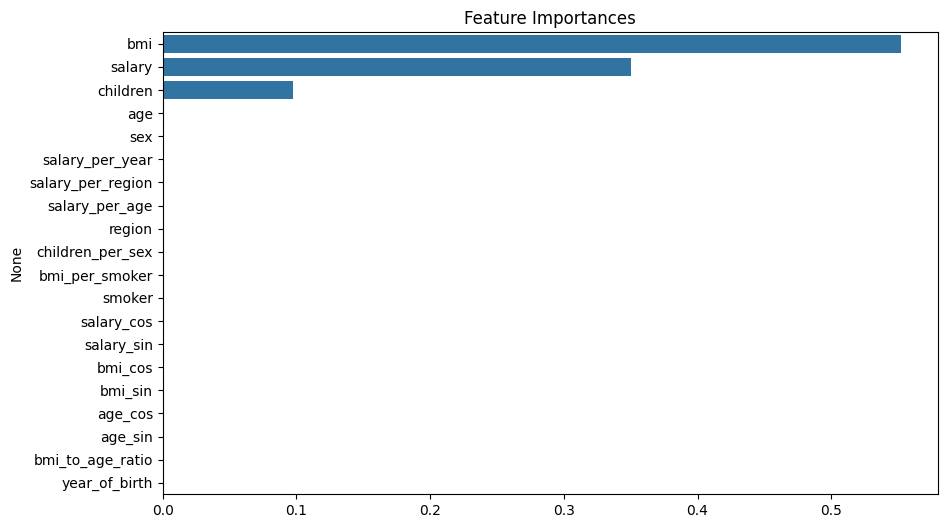

In [249]:
#feauture importance 
importances = data_health_classifier.feature_importances_

# Sort feature importances in descending order
indices = (-importances).argsort()

# Plot the feature importances
plt.figure(figsize=(10, 6))
sns.barplot(x=importances[indices], y=X_train.columns[indices])
plt.title('Feature Importances')
plt.show()

Model Evaluation Decision Tree

In [251]:
#Accuracy of the Decision Tree
from sklearn import metrics
print('The accuracy of Decision Trees is: ', metrics.accuracy_score(y_pred, y_test))

The accuracy of Decision Trees is:  1.0


Model Building and Training for KNN

In [252]:
#Fitting the KNN
from sklearn.neighbors import KNeighborsClassifier  
data_health_knn=KNeighborsClassifier(n_neighbors=9)
data_health_knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=9)

In [253]:
#Predicitng on thr test set results
y_pred_knn=data_health_knn.predict(X_test)
y_pred_knn

array([1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1,
       1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1,
       0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1,
       1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1,
       1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1,
       0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1,
       0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1,
       0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0,
       1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       1, 1, 0, 1], dtype=int64)

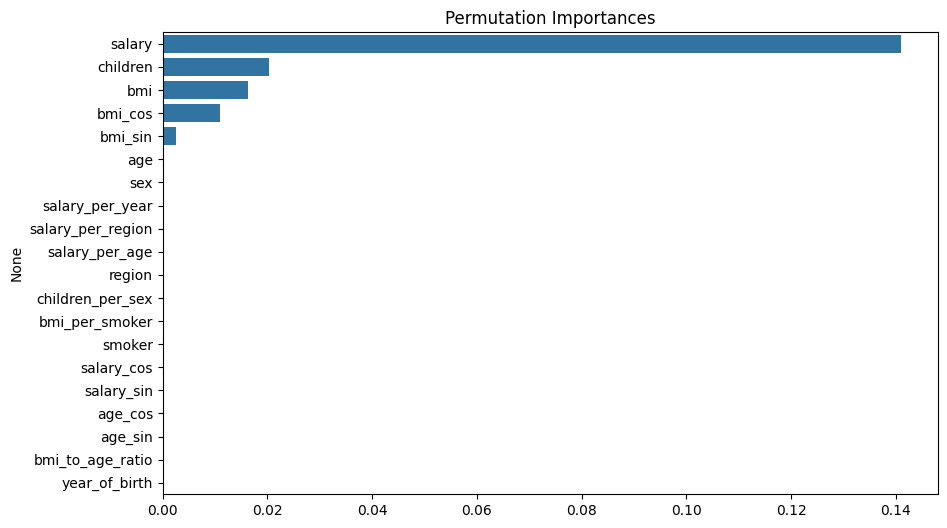

In [254]:
from sklearn.inspection import permutation_importance
# Calculate permutation importances
result = permutation_importance(data_health_knn, X_train, y_train, n_repeats=10, random_state=0)

# Get importances and indices
importances = result.importances_mean
indices = (-importances).argsort()

# Plot the feature importances
plt.figure(figsize=(10, 6))
sns.barplot(x=importances[indices], y=X_train.columns[indices])
plt.title('Permutation Importances')
plt.show()

Model Evaluation KNN

In [255]:
#Accuracy of the KNN
from sklearn import metrics
print('The accuracy of KNN is: ', metrics.accuracy_score(y_pred_knn, y_test))

The accuracy of KNN is:  1.0
